<a href="https://colab.research.google.com/github/dukenel/Data_Analytics/blob/master/ml_practice_problems_Duke_Nelson.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Business Question**

Heart Disease (UCI ML Dataset) from https://archive.ics.uci.edu/ml/datasets/Heart+Disease

The dataset is mulvariate and focuses on an area of life. It has 303 instances and 14 features with a target variable. A Classification Problem with a goal to determine if a patient has a heart disease or not. 

**The Business Question is to predict if a patient has a heart disease based off the given features in the dataset**

**Additional information to Data Set Attributes**
*   sex (1 = male; 0 = female)
*    cp: chest pain type  (Value 1: typical angina /Value 2: atypical angina / Value 3: non-anginal pain / Value 4: asymptomatic)
*   trestbps: resting blood pressure (in mm Hg on admission to the hospital)
*   chol: serum cholestoral in mg/dl
*   fbs: (fasting blood sugar > 120 mg/dl) (1 = true; 0 = false)
*   thalach: maximum heart rate achieved
*   restecg: resting electrocardiographic results (Value 0: normal / Value 1: having ST-T wave abnormality (T wave inversions and/or ST elevation or depression of > 0.05 mV) / Value 2: showing probable or definite left ventricular hypertrophy by Estes' criteria
*   exang: exercise induced angina (1 = yes; 0 = no)
*   oldpeak = ST depression induced by exercise relative to rest
*   ca: number of major vessels (0-3) colored by flourosopy
*   thal: 3 = normal; 6 = fixed defect; 7 = reversable defect

In [134]:
# Url 
# https://archive.ics.uci.edu/ml/datasets/Heart+Disease

# heart disease github dataset url = https://raw.githubusercontent.com/niteen11/data301_predictive_analytics_machine_learning/main/data/heart.csv

**Import Libraries**

In [135]:
import pandas as pd
import numpy as np
import seaborn as sns
%matplotlib inline
import matplotlib.pyplot as plt
import statsmodels.api as sm
from statsmodels.graphics.gofplots import qqplot


# **Data Acquisition**

In [136]:
data_df = pd.read_csv('https://raw.githubusercontent.com/niteen11/data301_predictive_analytics_machine_learning/main/data/heart.csv')

# **Data Wrangling**

In [137]:
data_df.columns

Index(['age', 'sex', 'cp', 'trestbps', 'chol', 'fbs', 'restecg', 'thalach',
       'exang', 'oldpeak', 'slope', 'ca', 'thal', 'target'],
      dtype='object')

In [138]:
data_df.head()

age  sex  cp  trestbps  chol  fbs  ...  exang  oldpeak  slope  ca  thal  target
0   63    1   3       145   233    1  ...      0      2.3      0   0     1       1
1   37    1   2       130   250    0  ...      0      3.5      0   0     2       1
2   41    0   1       130   204    0  ...      0      1.4      2   0     2       1
3   56    1   1       120   236    0  ...      0      0.8      2   0     2       1
4   57    0   0       120   354    0  ...      1      0.6      2   0     2       1

[5 rows x 14 columns]

In [139]:
data_df.shape

(303, 14)

In [140]:
data_df.isnull().sum()

age         0
sex         0
cp          0
trestbps    0
chol        0
fbs         0
restecg     0
thalach     0
exang       0
oldpeak     0
slope       0
ca          0
thal        0
target      0
dtype: int64

In [141]:
data_df.isna().any()

age         False
sex         False
cp          False
trestbps    False
chol        False
fbs         False
restecg     False
thalach     False
exang       False
oldpeak     False
slope       False
ca          False
thal        False
target      False
dtype: bool

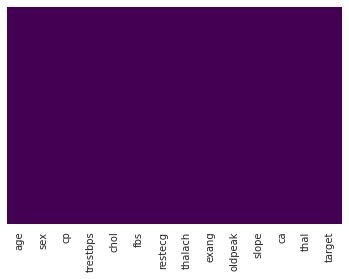

In [142]:
#Confirm data integrity on null values using heatmap
sns.heatmap(data_df.isnull(), yticklabels=False,cbar=False,cmap='viridis')

Heatmap above indicates that our dataset is devoid of missing values

In [143]:
#Let's check for any duplicates and drop them if exist.
data_df.drop_duplicates(subset=None, keep=False, inplace=True)

In [144]:
data_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 301 entries, 0 to 302
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       301 non-null    int64  
 1   sex       301 non-null    int64  
 2   cp        301 non-null    int64  
 3   trestbps  301 non-null    int64  
 4   chol      301 non-null    int64  
 5   fbs       301 non-null    int64  
 6   restecg   301 non-null    int64  
 7   thalach   301 non-null    int64  
 8   exang     301 non-null    int64  
 9   oldpeak   301 non-null    float64
 10  slope     301 non-null    int64  
 11  ca        301 non-null    int64  
 12  thal      301 non-null    int64  
 13  target    301 non-null    int64  
dtypes: float64(1), int64(13)
memory usage: 35.3 KB


#**Data Visualization (EDA)**

In [145]:
#Let's replace some of the field values to provide better understanding to our data Exploration.
#Create a copy of the dataframe
data2 = data_df.copy()

In [146]:
data2["sex"].replace({1: "male", 0: "female"}, inplace=True)
data2["fbs"].replace({1: "True", 0: "False"}, inplace=True)
data2["cp"].replace({0: "Typical", 1: "Atypical", 2: "Non-Anginal", 3: "Asymptomatic"}, inplace=True)
data2["restecg"].replace({0: "normal", 1: "stt", 2: "hypertrophy"}, inplace=True)
data2["exang"].replace({1: "Yes", 0: "No"}, inplace=True)
data2["slope"].replace({1: "unsloping", 2: "flat", 3: "downsloping"}, inplace=True)
data2["thal"].replace({3: "normal", 6: "fixed defect", 7: "reversable defect"}, inplace=True)

In [173]:
!pip install pandas-profiling==2.7.1

In [174]:
import pandas_profiling as pp

In [175]:
pp.ProfileReport(data2)

Summarize dataset:   0%|          | 0/27 [00:00<?, ?it/s]

Generate report structure:   0%|          | 0/1 [00:00<?, ?it/s]

Render HTML:   0%|          | 0/1 [00:00<?, ?it/s]

Observation from EDA

Our data contains *301 observation(rows)*  and *14 variables (columns)* and has *no null values and no Duplicates*.

The average age for participants is 54.5 years with the lowest age as 29 and the highest as 77.
We also observe that there are more males than females in the dataset.

Most participants have a cholesterol value between 200 and 300 mg/dl with the higher values occuring in patients between 55 and 70yrs.

We also observe that as one ages, the maximum heart rate (thalac) decreases

Our **Target Variable** (y) will be "*Target*", and it is of type boolean.

In [147]:
data2.groupby(['sex','restecg'])['target'].count()

sex     restecg    
female  hypertrophy      3
        normal          44
        stt             49
male    hypertrophy      1
        normal         103
        stt            101
Name: target, dtype: int64

##For both genders, we observe that most patients with heart disease do not have a high resting ecg as the cause

Text(0.5, 1.0, 'Effects of Chest Pain on Heart Disease')

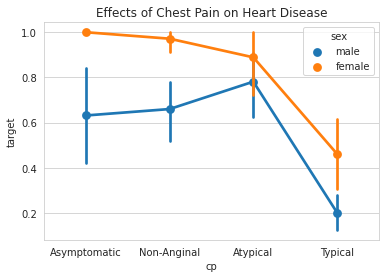

In [148]:
sns.pointplot(x="cp", y="target", hue="sex", data = data2)
plt.title("Effects of Chest Pain on Heart Disease")

##We observe from the above plot that for all genders, heart disease is mainly caused by persons with no symptoms of chest pain (cp = 1)

/usr/local/lib/python3.7/dist-packages/seaborn/categorical.py:3717: UserWarning: The `factorplot` function has been renamed to `catplot`. The original name will be removed in a future release. Please update your code. Note that the default `kind` in `factorplot` (`'point'`) has changed `'strip'` in `catplot`.
  warnings.warn(msg)


Text(0.5, 1.0, 'Restecg vs. Heart Disease')

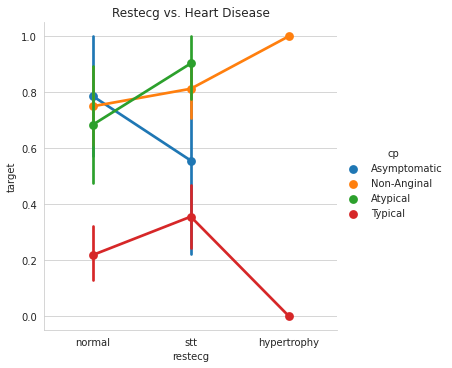

In [149]:
sns.factorplot(x="restecg", y="target", hue="cp", data=data2)
plt.title("Restecg vs. Heart Disease")

##For all categories of restecg, persons with no symptoms of chest pain have higher heart disease

Text(0.5, 1.0, 'Heart Disease by Gender and Cholestoral Level')

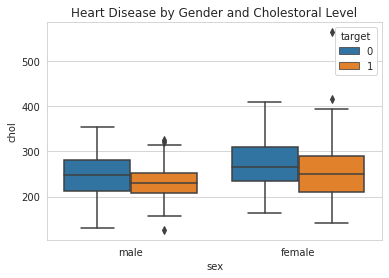

In [150]:
sns.boxplot(x="sex", y="chol", hue="target",data=data2)
plt.title("Heart Disease by Gender and Cholestoral Level")

##We observe that women have a higher cholesterol level as a cause of their heart disease


Text(0.5, 1.0, 'Heart Disease and Blood Sugar Level by Gender')

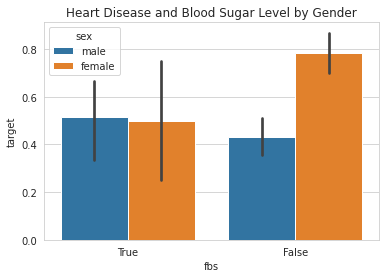

In [151]:
#Scatterplot with one categorical variable
sns.barplot(x="fbs", y="target", hue="sex", data=data2)
plt.title("Heart Disease and Blood Sugar Level by Gender")

##For a low fasting blood sugar, women are highly at risk of getting heart disease than men.
##For a high fasting blood sugar (>120mg/dl), both genders are fairly at risk of a heart disease.

In [152]:
data2.groupby(['target', 'sex'])['age'].mean()

target  sex   
0       female    59.041667
        male      56.087719
1       female    54.555556
        male      51.186813
Name: age, dtype: float64

##Average age for a woman to get a heart disease is 54.
##For the Men, the high risk age is averagely 51.

/usr/local/lib/python3.7/dist-packages/seaborn/categorical.py:3717: UserWarning: The `factorplot` function has been renamed to `catplot`. The original name will be removed in a future release. Please update your code. Note that the default `kind` in `factorplot` (`'point'`) has changed `'strip'` in `catplot`.
  warnings.warn(msg)


Text(0.5, 1.0, 'Heart Disease vs. Age')

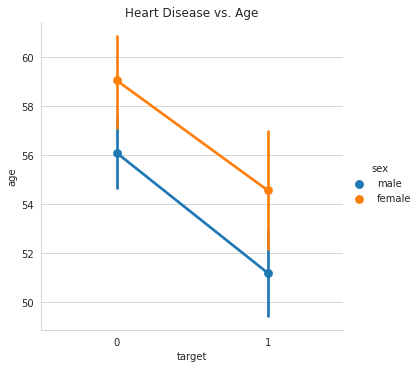

In [153]:
sns.factorplot(x="target", y="age", hue="sex", data=data2)
plt.title("Heart Disease vs. Age")

In [154]:
data2.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 301 entries, 0 to 302
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       301 non-null    int64  
 1   sex       301 non-null    object 
 2   cp        301 non-null    object 
 3   trestbps  301 non-null    int64  
 4   chol      301 non-null    int64  
 5   fbs       301 non-null    object 
 6   restecg   301 non-null    object 
 7   thalach   301 non-null    int64  
 8   exang     301 non-null    object 
 9   oldpeak   301 non-null    float64
 10  slope     301 non-null    object 
 11  ca        301 non-null    int64  
 12  thal      301 non-null    object 
 13  target    301 non-null    int64  
dtypes: float64(1), int64(6), object(7)
memory usage: 45.3+ KB


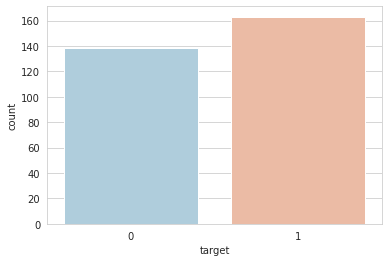

In [155]:
#Checking for Balance Data on the Target Variable
sns.set_style('whitegrid')
sns.countplot(x='target', data=data_df, palette = 'RdBu_r')

Our Target variable is fairly balanced. We will however proceed with it for the Machine Learning

#**ML Modeling (Building, Selection and Evaluation)**

*Models under consideration:*

**1.   Logistic Regression**

**2.   KNN**

**3.   Decision Tree**

***For each model, we will:***

**1.Train the dataset**

**2.Fit our Model**

**3.Predict and**

**4.Finally Evaluate**


In [156]:
data_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 301 entries, 0 to 302
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       301 non-null    int64  
 1   sex       301 non-null    int64  
 2   cp        301 non-null    int64  
 3   trestbps  301 non-null    int64  
 4   chol      301 non-null    int64  
 5   fbs       301 non-null    int64  
 6   restecg   301 non-null    int64  
 7   thalach   301 non-null    int64  
 8   exang     301 non-null    int64  
 9   oldpeak   301 non-null    float64
 10  slope     301 non-null    int64  
 11  ca        301 non-null    int64  
 12  thal      301 non-null    int64  
 13  target    301 non-null    int64  
dtypes: float64(1), int64(13)
memory usage: 45.3 KB


In [157]:
#Let's define our input features
X = data_df[['age', 'cp', 'trestbps','chol','fbs', 'restecg', 'thalach','exang','oldpeak', 'slope', 'ca','thal']]

In [158]:
X.head()

age  cp  trestbps  chol  fbs  ...  exang  oldpeak  slope  ca  thal
0   63   3       145   233    1  ...      0      2.3      0   0     1
1   37   2       130   250    0  ...      0      3.5      0   0     2
2   41   1       130   204    0  ...      0      1.4      2   0     2
3   56   1       120   236    0  ...      0      0.8      2   0     2
4   57   0       120   354    0  ...      1      0.6      2   0     2

[5 rows x 12 columns]

In [159]:
#Let's define our target variable ("target")
y=data_df[['target']]

In [160]:
y.head()

target
0       1
1       1
2       1
3       1
4       1

# **A. ML - Logistic Regression**

In [161]:
from sklearn.linear_model import LogisticRegression

In [162]:
logReg = LogisticRegression()

In [163]:
#CALL THE SKLEARN PACKAGE TO BE USED FOR ANALYSIS
from sklearn.model_selection import train_test_split

In [164]:
x_train, x_test, y_train, y_test = train_test_split(X,y, test_size = 0.30, random_state = 101)

In [165]:
print(x_train.shape)
print(x_test.shape)
print(y_train.shape)
print(y_test.shape)

(210, 12)
(91, 12)
(210, 1)
(91, 1)


In [166]:
logReg.fit(x_train,y_train)

/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:985: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:818: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG,


LogisticRegression()

In [167]:
y_pred = logReg.predict(x_test)

In [168]:
y_pred

array([0, 0, 1, 1, 0, 1, 0, 1, 1, 0, 0, 1, 0, 1, 1, 1, 1, 0, 1, 0, 0, 1,
       0, 1, 1, 0, 1, 0, 1, 0, 0, 1, 1, 0, 0, 1, 0, 0, 1, 1, 1, 0, 1, 1,
       1, 1, 0, 0, 1, 0, 1, 1, 1, 1, 1, 0, 0, 0, 1, 0, 0, 0, 0, 1, 1, 0,
       1, 0, 0, 1, 1, 0, 1, 1, 0, 0, 1, 1, 0, 1, 1, 0, 1, 1, 0, 0, 1, 0,
       1, 1, 1])

In [169]:
logReg.score(x_test,y_test)

0.8791208791208791

In [170]:
from sklearn.metrics import confusion_matrix

In [171]:
confusion_matrix(y_test,y_pred)

array([[38,  8],
       [ 3, 42]])

In [172]:
from sklearn.metrics import classification_report

In [173]:
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.93      0.83      0.87        46
           1       0.84      0.93      0.88        45

    accuracy                           0.88        91
   macro avg       0.88      0.88      0.88        91
weighted avg       0.88      0.88      0.88        91



In [174]:
cm = confusion_matrix(y_test,y_pred)

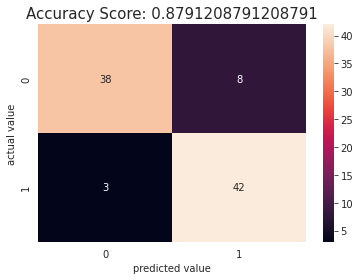

In [175]:
sns.heatmap(cm,annot=True,fmt='0.0f');
plt.ylabel('actual value');
plt.xlabel('predicted value');
plt.title('Accuracy Score: {0}'.format(logReg.score(x_test,y_test)) , size = 15);

In [176]:
import matplotlib.pyplot as plt

#Feature Importance

In [177]:
from matplotlib import pyplot
# get importance
importance = logReg.coef_[0]
print(importance)

[ 0.00446705  0.6589651  -0.01117284  0.00282204  0.05634723  0.48136273
  0.0159258  -0.91424894 -0.495803    0.44436782 -0.87117421 -0.84126211]


Feature: 0, Score: 0.00447
Feature: 1, Score: 0.65897
Feature: 2, Score: -0.01117
Feature: 3, Score: 0.00282
Feature: 4, Score: 0.05635
Feature: 5, Score: 0.48136
Feature: 6, Score: 0.01593
Feature: 7, Score: -0.91425
Feature: 8, Score: -0.49580
Feature: 9, Score: 0.44437
Feature: 10, Score: -0.87117
Feature: 11, Score: -0.84126


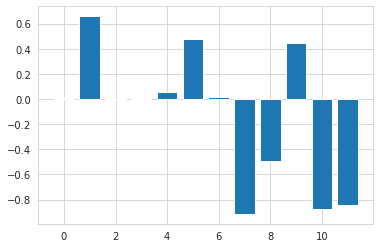

In [178]:
for i,v in enumerate(importance):
  print('Feature: %0d, Score: %.5f' % (i,v))
# plot feature importance
pyplot.bar([x for x in range(len(importance))], importance)
pyplot.show()

## Evaluation - Using the F1 Score, we observe that our Logistic Regression Model is 88% accurate for predictions.

#**B. ML - KNN**

We will create a copy of the dataset, drop the "target" Target Variable and standardize our features.

To ensure that our Standard Scalar works well, we will dropped the Binary Atributes  "Sex", "Fasting Blood Sugar (fbs)" and "Exercise Induces Angina (exang)"

In [179]:
#Let's first create a copy of the dataset
data3 = data_df[['age', 'cp', 'trestbps','chol', 'restecg', 'thalach','oldpeak', 'slope', 'ca','thal']]

In [180]:
data3.head()

age  cp  trestbps  chol  restecg  thalach  oldpeak  slope  ca  thal
0   63   3       145   233        0      150      2.3      0   0     1
1   37   2       130   250        1      187      3.5      0   0     2
2   41   1       130   204        0      172      1.4      2   0     2
3   56   1       120   236        1      178      0.8      2   0     2
4   57   0       120   354        1      163      0.6      2   0     2

In [181]:
data3.tail()

age  cp  trestbps  chol  restecg  thalach  oldpeak  slope  ca  thal
298   57   0       140   241        1      123      0.2      1   0     3
299   45   3       110   264        1      132      1.2      1   0     3
300   68   0       144   193        1      141      3.4      1   2     3
301   57   0       130   131        1      115      1.2      1   1     3
302   57   1       130   236        0      174      0.0      1   1     2

In [182]:
#We will now standardize all of our values using the StandardScaler function.
from sklearn.preprocessing import StandardScaler

In [183]:
scalar = StandardScaler()

In [184]:
scalar.fit(data3)

StandardScaler()

In [185]:
scaled_features = scalar.transform(data3)

In [186]:
std_data=pd.DataFrame(scaled_features, columns=data3.columns)

In [187]:
std_data.head()

age        cp  trestbps  ...     slope        ca      thal
0  0.947406  1.979862  0.764179  ... -2.267787 -0.715684 -2.147043
1 -1.942072  1.009278 -0.090059  ... -2.267787 -0.715684 -0.515074
2 -1.497537  0.038694 -0.090059  ...  0.982708 -0.715684 -0.515074
3  0.169470  0.038694 -0.659551  ...  0.982708 -0.715684 -0.515074
4  0.280604 -0.931890 -0.659551  ...  0.982708 -0.715684 -0.515074

[5 rows x 10 columns]

In [230]:
#Import train_test_split from Python's sklearn library.
from sklearn.model_selection import train_test_split

In [231]:
#We will split our dataset into 30 and 70.
x1_train, x1_test, y1_train, y1_test = train_test_split(scaled_features, y, test_size = .30)

In [232]:
print(x1_train.shape)
print(x1_test.shape)
print(y1_train.shape)
print(y1_test.shape)

(210, 10)
(91, 10)
(210, 1)
(91, 1)


K Value and Accuracy

We will run a code snippet to determine the optimal values of K which will yield the maximum accuracy score. This will then be used for the Model.

In [243]:
from sklearn.neighbors import KNeighborsClassifier

In [244]:
import numpy as np

In [245]:
from sklearn import metrics

In [246]:
#Declare an array called score
score=[] 

In [247]:
for i in range(1,50):
  knn= KNeighborsClassifier(n_neighbors=i)
  knn.fit(x1_train,y1_train)
  y1_pred = knn.predict(x1_test)
  score.append(metrics.accuracy_score(y1_test,y1_pred))

/usr/local/lib/python3.7/dist-packages/sklearn/neighbors/_classification.py:198: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)
/usr/local/lib/python3.7/dist-packages/sklearn/neighbors/_classification.py:198: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)
/usr/local/lib/python3.7/dist-packages/sklearn/neighbors/_classification.py:198: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)
/usr/local/lib/python3.7/dist-packages/sklearn/neighbors/_classification.py:198: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for exam

In [248]:
 print(score)

[0.6923076923076923, 0.5934065934065934, 0.6923076923076923, 0.6923076923076923, 0.7252747252747253, 0.7032967032967034, 0.7692307692307693, 0.7802197802197802, 0.7912087912087912, 0.7802197802197802, 0.7912087912087912, 0.7912087912087912, 0.8021978021978022, 0.7692307692307693, 0.7802197802197802, 0.7582417582417582, 0.8021978021978022, 0.7912087912087912, 0.8021978021978022, 0.7912087912087912, 0.8131868131868132, 0.8021978021978022, 0.8131868131868132, 0.8131868131868132, 0.8241758241758241, 0.8131868131868132, 0.8241758241758241, 0.8131868131868132, 0.8131868131868132, 0.8131868131868132, 0.8131868131868132, 0.8021978021978022, 0.8241758241758241, 0.8131868131868132, 0.8241758241758241, 0.8241758241758241, 0.8241758241758241, 0.8241758241758241, 0.8241758241758241, 0.8241758241758241, 0.8241758241758241, 0.8241758241758241, 0.8241758241758241, 0.8241758241758241, 0.8241758241758241, 0.8131868131868132, 0.8241758241758241, 0.8131868131868132, 0.8241758241758241]


Text(0, 0.5, 'Accuracy Score')

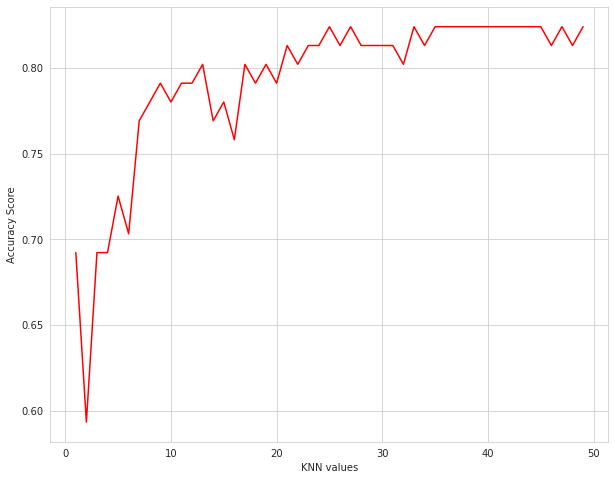

In [249]:
plt.figure(figsize=(10,8))
plt.plot(range(1,50), score, color='red')
plt.xlabel('KNN values') # Define the x-axis label
plt.ylabel('Accuracy Score') # Define the y-axis label

Error rate and K Value

In [250]:
import numpy as np

In [251]:
error_rate = []

for i in range(1,40):

  knn = KNeighborsClassifier(n_neighbors=i)
  knn.fit(x1_train,y1_train)
  pred_i = knn.predict(x1_test)
  error_rate.append(np.mean(pred_i != y1_pred))

/usr/local/lib/python3.7/dist-packages/sklearn/neighbors/_classification.py:198: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)
/usr/local/lib/python3.7/dist-packages/sklearn/neighbors/_classification.py:198: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)
/usr/local/lib/python3.7/dist-packages/sklearn/neighbors/_classification.py:198: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)
/usr/local/lib/python3.7/dist-packages/sklearn/neighbors/_classification.py:198: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for exam

(Text(0, 0.5, 'Eror Rate'),)

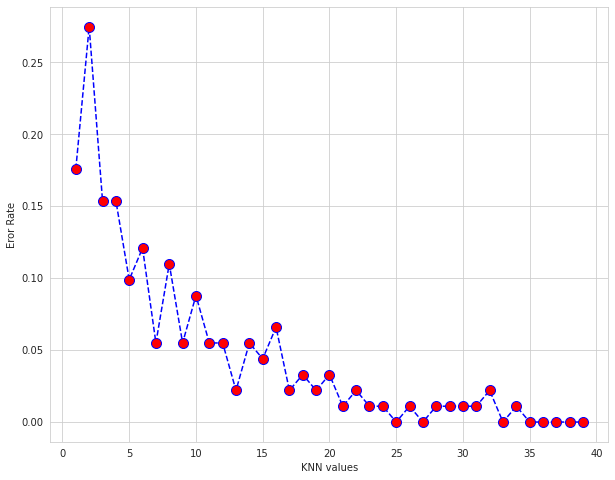

In [252]:
plt.figure(figsize=(10,8))
plt.plot(range(1,40), error_rate, color='blue', linestyle='dashed', marker='o', markerfacecolor='red', markersize =10)
plt.xlabel('KNN values')
plt.ylabel('Eror Rate'),

In [253]:
from sklearn.neighbors import KNeighborsClassifier

In [254]:
knn = KNeighborsClassifier(n_neighbors=33)

In [255]:
knn.fit(x1_train,y1_train)

/usr/local/lib/python3.7/dist-packages/sklearn/neighbors/_classification.py:198: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)


KNeighborsClassifier(n_neighbors=33)

In [256]:
y1_pred = knn.predict(x1_test)

In [257]:
y1_pred

array([1, 0, 1, 1, 1, 0, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1,
       0, 0, 1, 1, 1, 1, 0, 0, 0, 1, 0, 1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 1,
       0, 0, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 0, 0, 1, 0,
       1, 1, 1, 1, 0, 1, 1, 0, 0, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 0, 1, 1,
       0, 1, 1])

In [258]:
from sklearn.metrics import classification_report, confusion_matrix

In [259]:
cm = confusion_matrix(y1_test, y1_pred)
cm

array([[24, 13],
       [ 3, 51]])

In [260]:
score = knn.score(x1_test,y1_test)

In [261]:
score

0.8241758241758241

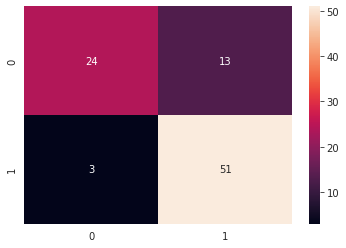

In [262]:
sns.heatmap(cm, annot=True,fmt='0.0f')

In [263]:
print(classification_report(y1_test,y1_pred))

              precision    recall  f1-score   support

           0       0.89      0.65      0.75        37
           1       0.80      0.94      0.86        54

    accuracy                           0.82        91
   macro avg       0.84      0.80      0.81        91
weighted avg       0.83      0.82      0.82        91



## Evaluation - Using the F1 Score, we observe that our KNN Model is 82% accurate for predictions.

#**C. ML - Decision Tree**

In [266]:
X2 = X

In [267]:
X2.columns

Index(['age', 'cp', 'trestbps', 'chol', 'fbs', 'restecg', 'thalach', 'exang',
       'oldpeak', 'slope', 'ca', 'thal'],
      dtype='object')

In [268]:
y2=y

In [269]:
y2.columns

Index(['target'], dtype='object')

In [270]:
#Import train_test_split from Python's sklearn library.
from sklearn.model_selection import train_test_split

In [271]:
#We will split our dataset into 30 and 70.
x2_train, x2_test, y2_train, y2_test = train_test_split(X2, y2, test_size = .30)

In [272]:
import pydotplus, graphviz
from sklearn import tree

In [273]:
from sklearn.tree import DecisionTreeClassifier

In [274]:
dec_gen_model = DecisionTreeClassifier(criterion='gini',splitter='best',max_depth=3,min_samples_leaf=4)

In [275]:
print(x2_train.shape)
print(x2_test.shape)
print(y2_train.shape)
print(y2_test.shape)

(210, 12)
(91, 12)
(210, 1)
(91, 1)


In [276]:
dec_gen_model.fit(x2_train,y2_train)

DecisionTreeClassifier(max_depth=3, min_samples_leaf=4)

In [277]:
y2_pred = dec_gen_model.predict(x2_test)

In [278]:
y2_pred

array([0, 1, 0, 0, 1, 0, 1, 1, 0, 1, 1, 1, 0, 1, 1, 0, 1, 0, 0, 0, 1, 1,
       1, 1, 1, 1, 1, 1, 0, 1, 1, 0, 0, 0, 1, 1, 1, 1, 0, 0, 0, 0, 1, 1,
       0, 1, 0, 1, 0, 1, 1, 1, 1, 1, 1, 0, 0, 0, 1, 1, 0, 1, 0, 0, 1, 1,
       0, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 1, 0, 1, 1, 1, 0, 0,
       0, 1, 0])

In [279]:
dec_gen_model.score(x2_test,y2_test)*100

79.12087912087912

In [222]:
pip install graphviz

In [223]:
pip install pydotplus

In [280]:
import pydotplus, graphviz
from sklearn import tree

In [281]:
import pandas as pd


In [282]:
dot_img = tree.export_graphviz(dec_gen_model,out_file='test_img.dot',feature_names=x2_train.columns,max_depth=3,class_names=['1','0'],filled=True,rounded=True)

In [283]:
tree_graph = pydotplus.graph_from_dot_file('test_img.dot')

In [285]:
from IPython.display import Image

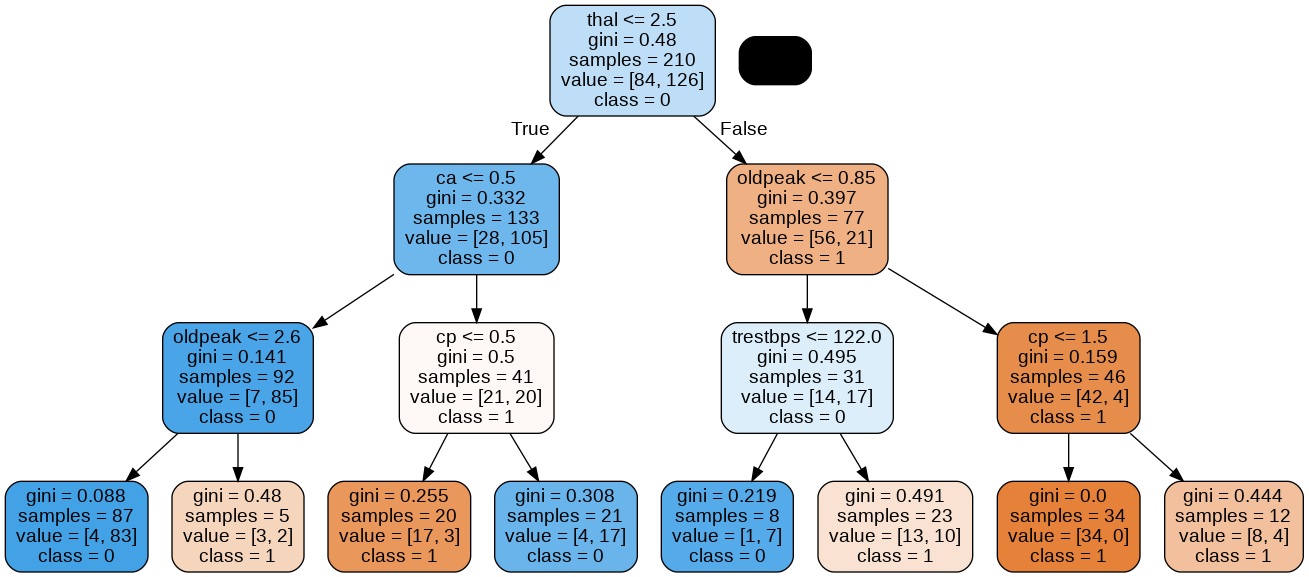

In [286]:
Image(tree_graph.create_png())

# **Conclusion**

For all Three models, we chose a train and test data split as 70% and 30% respectively. In all cases, the target variable "target" was used for the classification.

From the **Logistic Regression** model, our Accuracy Score is 88%

From the **KNN** Model, our Accuracy Score is 82%

From the **Decision Tree** model, our Accuracy Score is 79%

In all cases, the F1 score was used to compute the accuracy, since we have an imbalaced data and we seek to get a balance between Precision and Recall.



# **Next Steps**

Acquiring more data to strengthen the Accuracy and Robustness of the Model.

Balancing the Dataset and then remodeling to verify the performance of each model.